In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as model
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("seattleWeather_1948-2017.csv", header=0)
print(data.shape)

data = data.dropna() # losing the lines that clinde? 
print(data.shape)
print(list(data.columns))

(25551, 5)
(25548, 5)
['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN']


In [3]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
data['RAIN'].value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

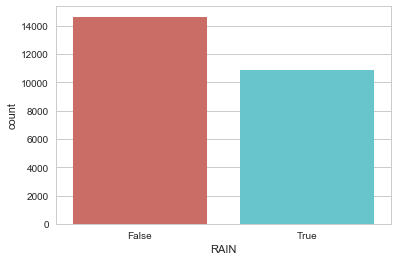

In [5]:
sns.countplot(x="RAIN", data=data, palette="hls")

So the rumors are not true... Seattle does not have more rainy days than non-rainy ones. 

In [6]:
data.groupby('RAIN').mean()

,PRCP,TMAX,TMIN
RAIN,,,
False,0.000000,63.831854,45.586633
True,0.248968,53.779541,43.071101


## Observations

There is a difference between the temperatures.. warmer days usually mean no rain.

Text(0,0.5,'Frequency')

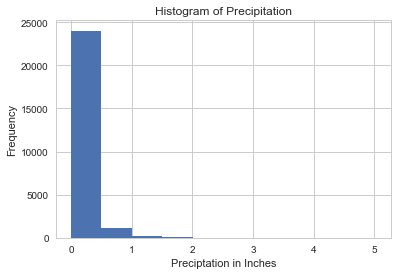

In [7]:
data.PRCP.hist()
plt.title("Histogram of Precipitation")
plt.xlabel("Preciptation in Inches")
plt.ylabel("Frequency")


In [8]:
X = data[['TMAX','TMIN']]
y = data["RAIN"]

# convert to
y = data.RAIN.astype(int)

In [9]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522785
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   RAIN   No. Observations:                25548
Model:                          Logit   Df Residuals:                    25546
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Feb 2018   Pseudo R-squ.:                  0.2338
Time:                        20:40:52   Log-Likelihood:                -13356.
converged:                       True   LL-Null:                       -17433.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TMAX          -0.2261      0.003    -71.132      0.000      -0.232      -0.220
TMIN           0.2895      0.

In [12]:
X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [14]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.751


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[3433  960]
 [ 943 2329]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.78      0.78      4393
          1       0.71      0.71      0.71      3272

avg / total       0.75      0.75      0.75      7665



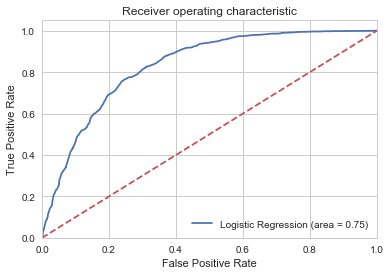

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_Logisitic')
plt.show()